In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=600)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

345

# 6.2.6

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import requests

In [7]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vila velha
Processing Record 2 of Set 1 | xiaoyi
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | elizabeth city
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | eureka
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | marienburg
Processing Record 16 of Set 1 | valencia
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | mulege
Processing Record 19 of Set 1 | la ronge
Processing Record 20 of Set 1 | harindanga
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | chhata
Processing Record 23 of Set 1 | norman wells
Processin

6.2.7

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vila Velha,-20.3297,-40.2925,87.94,62,20,11.50,BR,2022-03-02 14:16:33
1,Xiaoyi,34.6178,109.7030,51.57,22,0,2.68,CN,2022-03-02 14:16:34
2,Broome,42.2506,-75.8330,34.18,70,100,11.50,US,2022-03-02 14:16:34
3,Rikitea,-23.1203,-134.9692,79.47,67,74,14.07,PF,2022-03-02 14:14:02
4,Bluff,-46.6000,168.3333,43.81,84,61,6.35,NZ,2022-03-02 14:16:34


In [11]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [12]:
new_cols = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_cols]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vila Velha,BR,2022-03-02 14:16:33,-20.3297,-40.2925,87.94,62,20,11.50
1,Xiaoyi,CN,2022-03-02 14:16:34,34.6178,109.7030,51.57,22,0,2.68
2,Broome,US,2022-03-02 14:16:34,42.2506,-75.8330,34.18,70,100,11.50
3,Rikitea,PF,2022-03-02 14:14:02,-23.1203,-134.9692,79.47,67,74,14.07
4,Bluff,NZ,2022-03-02 14:16:34,-46.6000,168.3333,43.81,84,61,6.35


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

6.3.1

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1646230714.165997

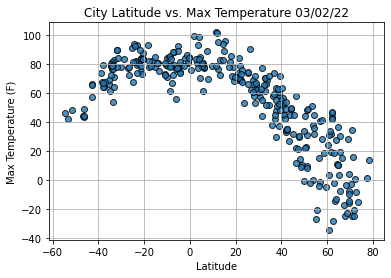

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

6.3.2

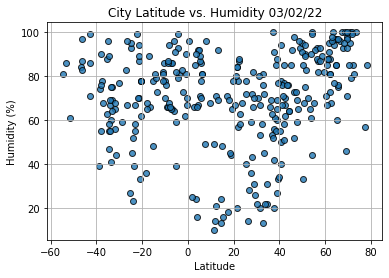

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

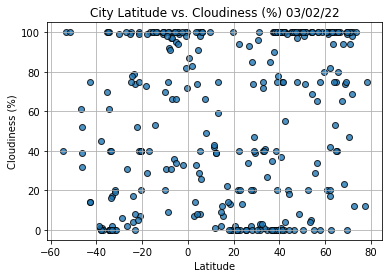

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

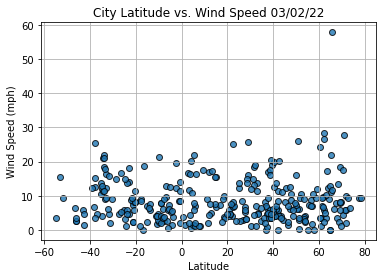

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Xiaoyi,CN,2022-03-02 14:16:34,34.6178,109.7030,51.57,22,0,2.68
2,Broome,US,2022-03-02 14:16:34,42.2506,-75.8330,34.18,70,100,11.50
7,Butaritari,KI,2022-03-02 14:16:36,3.0707,172.7902,80.38,85,14,11.74
8,Elizabeth City,US,2022-03-02 14:16:36,36.2946,-76.2511,58.05,69,0,8.05
11,Eureka,US,2022-03-02 14:16:37,40.8021,-124.1637,53.20,78,100,3.98


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

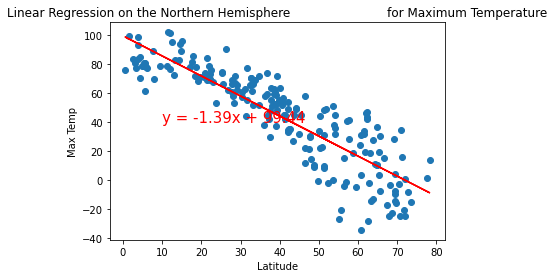

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

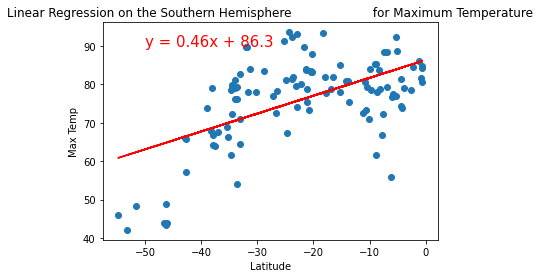

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                    'Linear Regression on the Southern Hemisphere \
                    for Maximum Temperature', 'Max Temp',(-50,90))

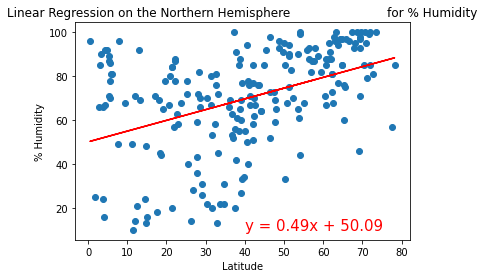

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

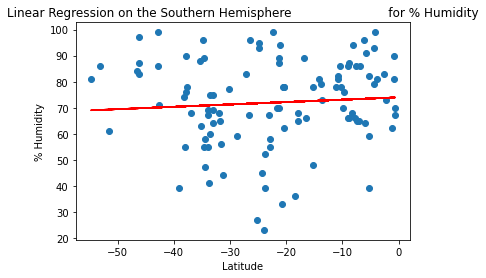

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

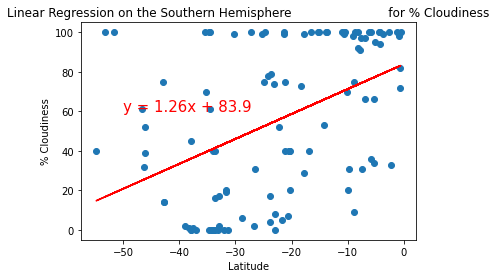

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

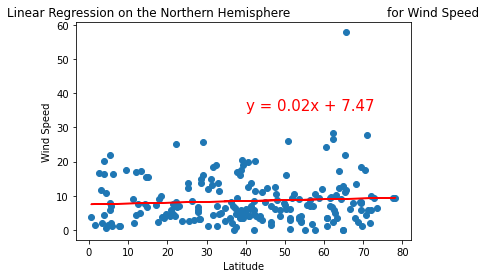

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

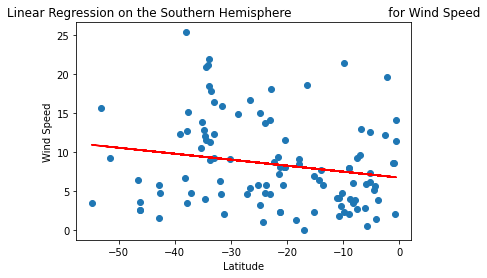

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

6.5.1

In [30]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [31]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Vila Velha,BR,2022-03-02 14:16:33,-20.3297,-40.2925,87.94,62,20,11.50
1,1,Xiaoyi,CN,2022-03-02 14:16:34,34.6178,109.7030,51.57,22,0,2.68
2,2,Broome,US,2022-03-02 14:16:34,42.2506,-75.8330,34.18,70,100,11.50
3,3,Rikitea,PF,2022-03-02 14:14:02,-23.1203,-134.9692,79.47,67,74,14.07
4,4,Bluff,NZ,2022-03-02 14:16:34,-46.6000,168.3333,43.81,84,61,6.35


In [32]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [33]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

6.5.3

In [35]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature (deg F) you would like for your trip? "))
max_temp = float(input("What is the maximum temperature (deg F) you would like for your trip? "))

In [36]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Vila Velha,BR,2022-03-02 14:16:33,-20.3297,-40.2925,87.94,62,20,11.50
3,3,Rikitea,PF,2022-03-02 14:14:02,-23.1203,-134.9692,79.47,67,74,14.07
5,5,Saint-Pierre,RE,2022-03-02 14:16:35,-21.3393,55.4781,83.88,70,100,8.05
6,6,Cape Town,ZA,2022-03-02 14:16:35,-33.9258,18.4232,76.26,67,40,18.41
7,7,Butaritari,KI,2022-03-02 14:16:36,3.0707,172.7902,80.38,85,14,11.74
9,9,Saint-Philippe,RE,2022-03-02 14:15:17,-21.3585,55.7679,83.79,87,99,7.20
10,10,Faanui,PF,2022-03-02 14:16:37,-16.4833,-151.7500,81.86,66,100,18.57
15,15,East London,ZA,2022-03-02 14:16:39,-33.0153,27.9116,82.62,69,2,16.33
18,18,Harindanga,IN,2022-03-02 14:16:40,22.0383,88.3214,78.78,57,0,4.21
26,26,Surin,TH,2022-03-02 14:16:43,14.8818,103.4936,88.92,48,12,6.62


In [37]:
preferred_cities_df.count()

City_ID       104
City          104
Country       104
Date          104
Lat           104
Lng           104
Max Temp      104
Humidity      104
Cloudiness    104
Wind Speed    104
dtype: int64

In [38]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Vila Velha,BR,87.94,-20.3297,-40.2925,
3,Rikitea,PF,79.47,-23.1203,-134.9692,
5,Saint-Pierre,RE,83.88,-21.3393,55.4781,
6,Cape Town,ZA,76.26,-33.9258,18.4232,
7,Butaritari,KI,80.38,3.0707,172.7902,
9,Saint-Philippe,RE,83.79,-21.3585,55.7679,
10,Faanui,PF,81.86,-16.4833,-151.7500,
15,East London,ZA,82.62,-33.0153,27.9116,
18,Harindanga,IN,78.78,22.0383,88.3214,
26,Surin,TH,88.92,14.8818,103.4936,


In [39]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [40]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
        
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

# Print 10 first hotels:
hotel_df.head(10)

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


,City,Country,Max Temp,Lat,Lng,Hotel Name
0,Vila Velha,BR,87.94,-20.3297,-40.2925,Hotel Vitória Palace
3,Rikitea,PF,79.47,-23.1203,-134.9692,People ThankYou
5,Saint-Pierre,RE,83.88,-21.3393,55.4781,Lindsey Hôtel
6,Cape Town,ZA,76.26,-33.9258,18.4232,"Radisson Blu Hotel Waterfront, Cape Town"
7,Butaritari,KI,80.38,3.0707,172.7902,Isles Sunset Lodge
9,Saint-Philippe,RE,83.79,-21.3585,55.7679,"Chambres d'hôte ""La Trinité"""
10,Faanui,PF,81.86,-16.4833,-151.7500,Bora-Bora Pearl Beach Resort & Spa
15,East London,ZA,82.62,-33.0153,27.9116,Tu Casa
18,Harindanga,IN,78.78,22.0383,88.3214,Hazi Home
26,Surin,TH,88.92,14.8818,103.4936,One Fu Hotel


In [41]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [43]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))